In [68]:
import numpy as np
import pandas as pd


In [69]:
v = pd.read_csv("/content/student_clustering.csv.csv")

In [70]:
v.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [71]:
v.shape

(200, 2)

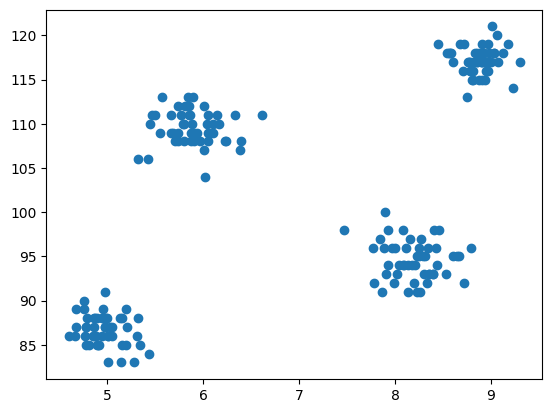

In [72]:
import matplotlib.pyplot as plt
plt.scatter(v["cgpa"] , v["iq"])

In [73]:
from sklearn.cluster import KMeans

In [74]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(v)
    wcss.append(km.inertia_)


# This loop runs K-Means from 1 cluster to 10 clusters.

# Each time, it creates a KMeans model and runs .fit(v),
# which means it applies clustering on the data v.

# km.inertia_ represents the WCSS (Within-Cluster Sum of Squares)
# for that number of clusters.

# That WCSS value is then appended to the list wcss.

In [75]:
wcss

# Analysis:

# k=1 → Very large WCSS (all points are forced into one cluster).

# k=2 and k=3 → Sharp drop in WCSS.

# k=4 → Even sharper drop (2503 → 682).

# From k=5 onwards → The improvement becomes smaller.

# k=6,7,8,9 → WCSS decreases slowly, meaning only marginal gains.

# Conclusion:

# For this dataset, the optimal number of clusters
# seems to be around 4 or 5 (according to the Elbow Method).
# If you plot the graph, you’ll clearly see an "elbow bend" at k=4.

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 523.7131894763968,
 503.6370666017319,
 326.9540379483692,
 242.41587382556415,
 207.78404404922944,
 183.62520804948647]

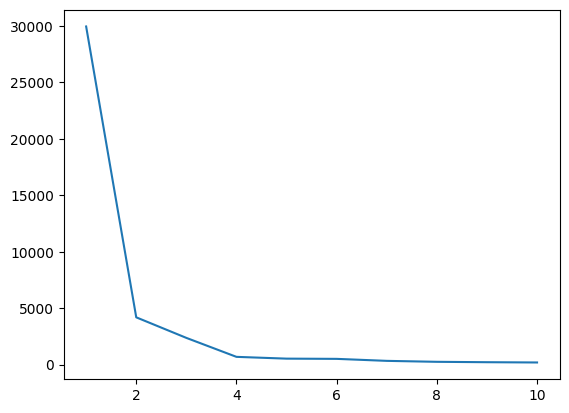

In [76]:

plt.plot(range(1,11),wcss)

# we could see as clustering  grps incresing wcc is decresing ...but
# after a specification points its becomes stable

# here elbow curves telling that number of curve should be 4 ...


In [77]:
x = v.iloc[:,:].values
km = KMeans(n_clusters=4)

# km.fit_predict(x)

# v is a pandas DataFrame.

# iloc[:,:] → selects all rows and all columns.

# .values → converts it into a NumPy array
#  (KMeans works best with NumPy arrays).

#  So, x now contains your entire dataset in array form.




# km = KMeans(n_clusters=4)

# Here you are creating a KMeans model
#  that will divide the data into 4 clusters.
# In other words, you have decided to split the dataset into 4 groups.




# km.fit_predict(x)


# fit_predict do kaam karta hai ek saath:

# fit(x): KMeans algorithm run karke clusters find karta hai.

# predict(x): Har data point ko ek cluster label assign karta hai
#  (0,1,2,3 in this case).

#  Output me ek array milega jisme har row ka cluster number hoga.


In [78]:
y_means = km.fit_predict(x)

In [79]:
y_means

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1], dtype=int32)

In [80]:
x[y_means == 1]

# rows which are coming in the clusters number 1

array([[  8.8 , 115.  ],
       [  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ],
       [  8.96, 116.  ],
       [  8.78, 116.  ],
       [  8.45, 119.  ],
       [  8.79, 116.  ],
       [  8.81, 115.  ],
       [  8.88, 115.  ],
       [  9.07, 117.  ],
       [  8.92, 118.  ],
       [  8.75, 113.  ],
       [  8.71, 116.  ],
       [  8.86, 118.  ],
       [  9.3 , 117.  ],
       [  9.01, 121.  ],
       [  8.97, 116.  ],
       [  9.  , 117.  ],
       [  8.76, 117.  ],
       [  8.78, 117.  ],
       [  9.23, 114.  ],
       [  9.03, 118.  ],
       [  9.13, 118.  ],
       [  8.91, 119.  ],
       [  8.98, 118.  ],
       [  9.03, 118.  ],
       [  8.86, 117.  ],
       [  8.89, 118.  ],
       [  8.97, 117.  ],
       [  8.72, 119.  ],
       [  8.93, 118.  ],
       [  8.58, 118.  ],
       [  8.94, 117.  ],
       [  8.6 , 117.  ],
       [  8.77, 117.  ],
       [  8.81, 116.  ],
       [  8.54, 118.  ],
       [  8.97, 119.  ],


In [81]:
x[y_means == 2]
# rows which are  coming at the cluster number 2

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ],
       [ 4.96, 88.  ],
       [ 4.86, 87.  ],
       [ 5.44, 84.  ],
       [ 5.34, 85.  ],
       [ 5.31, 86.  ],
       [ 5.14, 83.  ],
       [ 4.95, 86.  ],
       [ 5.21, 87.  ],
       [ 4.91, 85.  ],
       [ 5.28, 83.  ],
       [ 5.15, 88.  ],
       [ 4.9 , 85.  ],
       [ 4.89, 88.  ],
       [ 5.05, 86.  ],
       [ 4.98, 91.  ],
       [ 5.01, 86.  ],
       [ 4.95, 88.  ],
       [ 4.96, 89.  ],
       [ 4.85, 86.  ],
       [ 4.76, 90.  ],
       [ 4.98, 87.  ],
       [ 4.78, 87.  ],
       [ 5.2 , 85.  ],
       [ 5.05, 87.  ],
       [ 5.01, 83.  ],
       [ 4.77, 86.  ],
       [ 4.68, 87.  ],
       [ 4.81, 85.  ],
       [ 5.03, 87.  ],
       [ 4.98, 87.  ],
       [ 5.32, 88.  ],
       [ 4.86, 88.  ],
       [ 4.89, 85.  ],
       [ 4.88, 86.  ],
       [ 5.01, 86.  ],
       [ 4.67, 86.  ],
       [ 5.15, 85.  ],
       [ 4.97, 88.  ],
       [ 4.

In [82]:
x[y_means == 3]
#  rows which are coming in the cluster number 3

array([[  5.9 , 113.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ],
       [  5.71, 108.  ],
       [  5.5 , 111.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  5.43, 106.  ],
       [  6.01, 112.  ],
       [  5.32, 106.  ],
       [  5.91, 108.  ],
       [  5.57, 113.  ],
       [  6.4 , 108.  ],
       [  5.67, 109.  ],
       [  6.05, 108.  ],
       [  5.85, 111.  ],
       [  5.87, 109.  ],
       [  6.02, 104.  ],
       [  5.77, 111.  ],
       [  6.06, 109.  ],
       [  5.55, 109.  ],
       [  5.81, 112.  ],
       [  5.47, 111.  ],
       [  5.74, 109.  ],
       [  5.8 , 108.  ],
       [  5.88, 110.  ],
       [  5.91, 109.  ],
       [  5.67, 111.  ],
       [  5.74, 108.  ],
       [  5.69, 109.  ],
       [  6.05, 109.  ],
       [  6.14, 111.  ],
       [  5.74, 112.  ],
       [  5.94, 109.  ],
       [  5.86, 111.  ],
       [  6.38, 107.  ],
       [  6.61, 111.  ],
       [  6.04, 110.  ],


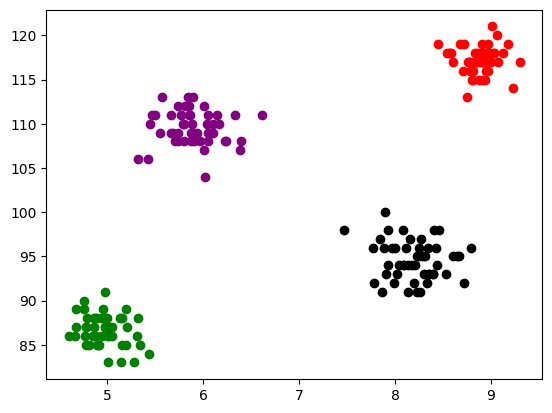

In [83]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='black')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='red')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='green')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='purple')


# plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='blue')

# lt.scatter(
#     x[y_means == 0, 0],   # cluster 0 ke points ke feature1 (x-axis values)
#     x[y_means == 0, 1],   # cluster 0 ke points ke feature2 (y-axis values)
#     color='blue'          # unko blue color me dikhana





# by below plotting we could see that the green cluster
# has niether good cg nor have good good
# iq ..
# so we have to focus over the green datset to make better
# and for purple datset will  motivate to improve the cg


**K_Mean 3-D data**

In [84]:
from sklearn.datasets import make_blobs
# here  is 3 features
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [85]:
X



array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [86]:
import plotly.express as px

colors = ["blue", "red", "green", "yellow"]

fig = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    color=y_means.astype(str),          # categorical clusters
    color_discrete_sequence=colors      # apne chosen 4 colors
)

fig.show()


In [87]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

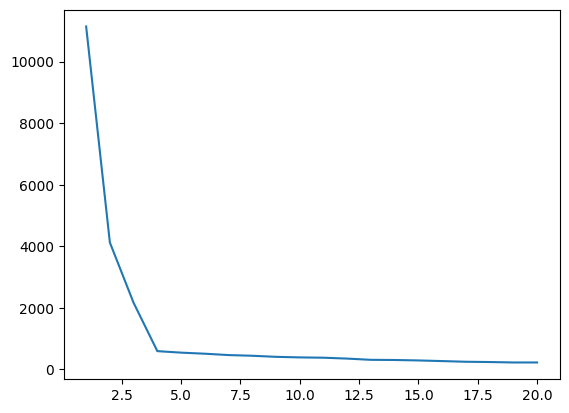

In [88]:
plt.plot(range(1,21),wcss)

In [89]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [90]:
v = pd.DataFrame()

v['col1'] = X[:,0]
v['col2'] = X[:,1]
v['col3'] = X[:,2]
v['label'] = y_pred

In [92]:
fig = px.scatter_3d(v,x='col1', y='col2', z='col3',color='label')
fig.show()